In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns 
import matplotlib.pyplot as plt
#
sns.set_palette("colorblind")
sns.set_style("whitegrid", {"axes.edgecolor": "black"})
sns.despine(top=False, right=False, left=False, bottom=False)
sns.set_context("paper", font_scale=1.4)

<Figure size 432x288 with 0 Axes>

In [2]:
dname = "../data/runtime"
ciphers = [
    "ascon", 
    "elephant",
    "gift", 
    "grain",
    "isap",
    "photon",
    "romulus", 
    "sparkle", 
    "tinyjambu",
    "xoodyak",
]

kpi = {
    "cipher": [],
    "mode": [], 
    "cycles": [],
}

for mode in ["encrypt", "decrypt"]:
    for cipher in ciphers:
        fname = "{}/{}_{}.log".format(dname, cipher, mode)

        with open(fname, "r") as f:
            cycles = f.readline()
            while cycles:
                kpi["cipher"].append(cipher)
                kpi["mode"].append(mode)
                kpi["cycles"].append(int(cycles))
                cycles = f.readline()

kpi = pd.DataFrame(kpi)

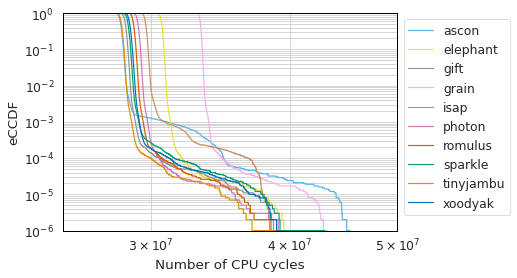

In [5]:
sli = kpi.loc[kpi["mode"]=="encrypt"]
ax = sns.ecdfplot(
    sli, x="cycles", hue="cipher", hue_order=ciphers[::-1], complementary=True
)
_ = plt.yscale("log")
_ = plt.xscale("log")
_ = plt.grid(True, which="both")
_ = plt.ylabel("eCCDF")
_ = plt.xlabel("Number of CPU cycles")
_ = plt.xlim([2.5e7, 5e7])
_ = plt.ylim([1e-6, 1])
_ = plt.legend(ciphers, loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(f"./eCDF_encrypt.png", bbox_inches="tight", pad_inches=0.05)

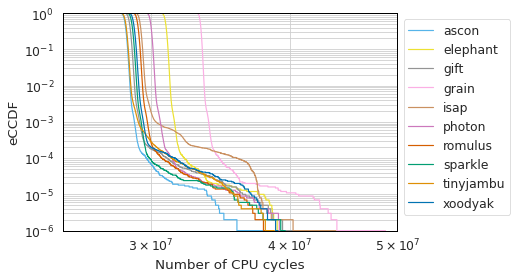

In [6]:
sli = kpi.loc[kpi["mode"]=="decrypt"]
ax = sns.ecdfplot(
    sli, x="cycles", hue="cipher", hue_order=ciphers[::-1], complementary=True
)
_ = plt.yscale("log")
_ = plt.xscale("log")
_ = plt.grid(True, which="both")
_ = plt.ylabel("eCCDF")
_ = plt.xlabel("Number of CPU cycles")
_ = plt.xlim([2.5e7, 5e7])
_ = plt.ylim([1e-6, 1])
_ = plt.legend(ciphers, loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(f"./eCDF_decrypt.png", bbox_inches="tight", pad_inches=0.05)